In [353]:
# importing required librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [372]:
# setting figure display size
figsize = (15,10)

In [336]:
# setting max rows to display
pd.set_option('display.max_rows', None)

In [315]:
# importing dataset
Movies_Industry = pd.read_excel('/Users/mohitagrawal/Desktop/movies1.xlsx')

In [349]:
# looking at the data
Movies_Industry.shape

(7643, 18)

In [348]:
# checking missing values
Movies_Industry.isnull().sum()

name                0
rating              0
genre               0
year                0
released            0
released_date       0
released_country    0
score               0
votes               0
director            0
writer              0
star                0
country             0
budget              0
gross               0
company             0
runtime             0
released_year       0
dtype: int64

In [318]:
# filling missing values in rating column with most occuring rating
Movies_Industry['rating'].fillna(Movies_Industry['rating'].mode()[0], inplace = True)


In [319]:
mean_budget = np.ceil(Movies_Industry['budget'].mean())

In [320]:
# filling missing values in budget column with mean value
Movies_Industry['budget'].fillna(mean_budget, inplace = True)

In [321]:
mean_gross = np.floor(Movies_Industry['gross'].mean())

In [322]:
# filling missing values in gross column with mean value
Movies_Industry['gross'].fillna(mean_gross, inplace = True)

In [323]:
# dropping rest of the null records
Movies_Industry.dropna(inplace = True)

In [328]:
# checking datatypes
Movies_Industry.dtypes

name                        object
rating                      object
genre                       object
year                         int64
released                    object
released_date       datetime64[ns]
released_country            object
score                      float64
votes                        int64
director                    object
writer                      object
star                        object
country                     object
budget                       int64
gross                        int64
company                     object
runtime                      int64
dtype: object

In [325]:
# changing datatypes
Movies_Industry['budget'] = Movies_Industry['budget'].astype(int)
Movies_Industry['gross'] = Movies_Industry['gross'].astype(int)
Movies_Industry['votes'] = Movies_Industry['votes'].astype(int)
Movies_Industry['runtime'] = Movies_Industry['runtime'].astype(int)


In [327]:
# converting released year as datetime format
Movies_Industry['released_date'] = pd.to_datetime(Movies_Industry['released_date'], format = '%B %d, %Y')

In [329]:
# extracting correct released year
Movies_Industry['released_year'] = Movies_Industry['released_date'].dt.year

In [449]:
# top 20 highest gross movies
Movies_Industry.sort_values(by = ['gross'], ascending = False, inplace = False).head(5)


,name,rating,genre,released,released_date,released_country,score,votes,director,writer,star,budget,gross,company,runtime,released_year
5445,532,5,0,685,2009-12-18,55,7.8,1100000,1153,1774,2324,237000000,2847246203,2246,162,2009
7445,534,5,0,172,2019-04-26,55,8.4,903000,162,739,2231,356000000,2797501328,1599,181,2019
3045,6873,5,6,693,1997-12-19,55,7.8,1100000,1153,1774,1587,200000000,2201647264,2246,194,1997
6663,5128,5,0,687,2015-12-18,55,7.8,876000,1123,2541,520,245000000,2069521700,1533,138,2015
7244,535,5,0,181,2018-04-27,55,8.4,897000,162,739,2231,321000000,2048359754,1599,149,2018


In [448]:
# dropping duplicates
Movies_Industry.drop_duplicates().head(5)

,name,rating,genre,released,released_date,released_country,score,votes,director,writer,star,budget,gross,company,runtime,released_year
0,6566,6,6,1700,1980-06-13,55,8.4,927000,2577,3999,1041,19000000,46998772,2312,146,1980
1,5555,6,1,1485,1980-07-02,55,5.8,65000,2260,1628,325,4500000,58853106,727,104,1980
2,5126,4,0,1763,1980-06-20,55,8.7,1200000,1109,2558,1737,18000000,538375067,1533,124,1980
3,285,4,4,1485,1980-07-02,55,7.7,221000,1297,1994,2236,3500000,83453539,1805,88,1980
4,1026,6,4,1536,1980-07-25,55,7.3,108000,1052,518,408,6000000,39846344,1770,98,1980


In [347]:
Movies_Industry.describe()

,year,score,votes,budget,gross,runtime,released_year
count,7643.000000,7643.000000,7.643000e+03,7.643000e+03,7.643000e+03,7643.000000,7643.000000
mean,2000.399581,6.392045,8.832621e+04,3.563426e+07,7.861166e+07,107.291509,2000.620960
std,11.134822,0.968163,1.635009e+05,3.513557e+07,1.638969e+08,18.574868,11.144121
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,63.000000,1980.000000
25%,1991.000000,5.800000,9.200000e+03,1.400000e+07,4.728876e+06,95.000000,1991.000000
50%,2000.000000,6.500000,3.300000e+04,3.558988e+07,2.141310e+07,104.000000,2001.000000
75%,2010.000000,7.100000,9.400000e+04,3.558988e+07,7.850054e+07,116.000000,2010.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,2020.000000


In [378]:
# checking correlation between all the variables 
# perason is default correlation method, but we can use kendall and spearman also

correlation_metrics = Movies_Industry[['released_year', 'budget', 'gross', 'votes', 'score', 'runtime']].corr(method = 'pearson')  
# gross and budget are showing correlation close to 1 i.e they have linear correlation
# it seems that year and score does not have linear relation but they may have non linear relationship


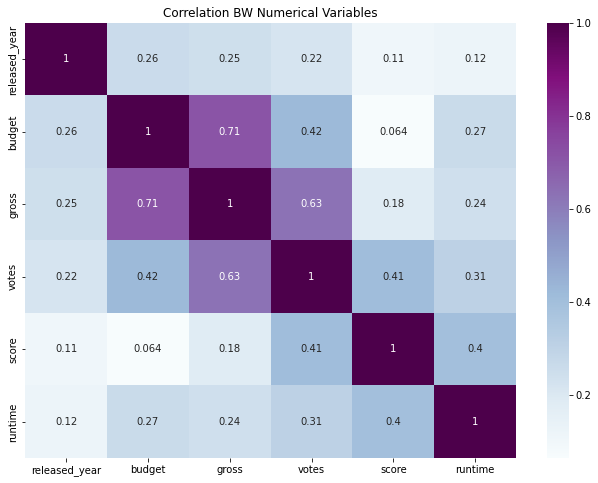

In [384]:

plt.figure(figsize=(11,8))
sns.heatmap(correlation_metrics, annot = True, cmap="BuPu") 
plt.title('Correlation BW Numerical Variables')
plt.show()

Text(0, 0.5, 'GROSS')

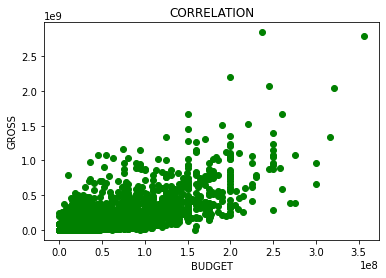

In [366]:
# correlation between gross and budget using matplotlib scatter plot
plt.scatter(x = Movies_Industry['budget'], y = Movies_Industry['gross'], color = 'green')
plt.title('CORRELATION')
plt.xlabel('BUDGET')
plt.ylabel('GROSS')

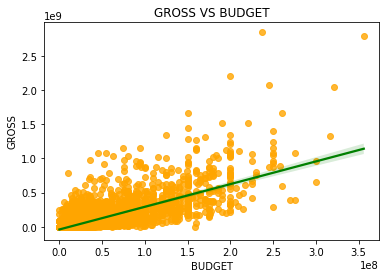

In [375]:
# correlation between gross and budget using seaborn

sns.regplot(x = 'budget', y = 'gross', data = Movies_Industry, scatter_kws = {'color' : 'orange'},
            line_kws = {'color' : 'green'})
plt.title('GROSS VS BUDGET')
plt.xlabel('BUDGET')
plt.ylabel('GROSS')
plt.show()

In [432]:
# count of each categorical column in dataset
df_numeric = Movies_Industry        # assigning old dataframe to new name

for col_names in df_numeric.columns:
    if df_numeric[col_names].dtypes == 'object':
        df_numeric[col_names] = df_numeric[col_names].astype('category')
        df_numeric[col_names] = df_numeric[col_names].cat.codes
    
df_numeric.sort_values(by = 'gross', ascending = False).head(10)

,name,rating,genre,released,released_date,released_country,score,votes,director,writer,star,budget,gross,company,runtime,released_year
5445,532,5,0,685,2009-12-18,55,7.8,1100000,1153,1774,2324,237000000,2847246203,2246,162,2009
7445,534,5,0,172,2019-04-26,55,8.4,903000,162,739,2231,356000000,2797501328,1599,181,2019
3045,6873,5,6,693,1997-12-19,55,7.8,1100000,1153,1774,1587,200000000,2201647264,2246,194,1997
6663,5128,5,0,687,2015-12-18,55,7.8,876000,1123,2541,520,245000000,2069521700,1533,138,2015
7244,535,5,0,181,2018-04-27,55,8.4,897000,162,739,2231,321000000,2048359754,1599,149,2018
7480,6174,4,2,1484,2019-07-19,55,6.9,222000,1451,1914,671,260000000,1670727580,2309,118,2019
6653,2964,5,0,1699,2015-06-12,55,7.0,593000,517,3554,435,150000000,1670516444,2274,124,2015
6043,5484,5,0,2461,2012-05-04,55,8.0,1300000,1512,2306,2231,220000000,1518815515,1599,143,2012
6646,2142,5,0,209,2015-04-03,55,7.1,370000,1186,702,2710,190000000,1515341399,2274,137,2015
7494,2128,4,2,2663,2019-11-22,55,6.8,148000,432,1945,1519,150000000,1450026933,2308,103,2019


In [435]:
df_numeric.columns

Index(['name', 'rating', 'genre', 'released', 'released_date',
       'released_country', 'score', 'votes', 'director', 'writer', 'star',
       'budget', 'gross', 'company', 'runtime', 'released_year'],
      dtype='object')

In [438]:
# dataframe for overall correlation 
df = df_numeric[['name', 'rating', 'genre', 'released',
       'released_country', 'score', 'votes', 'director', 'writer', 'star',
       'budget', 'gross', 'company', 'runtime', 'released_year']]

In [441]:
df.corr()

,name,rating,genre,released,released_country,score,votes,director,writer,star,budget,gross,company,runtime,released_year
name,1.000000,-0.012444,0.015210,-0.010201,0.000510,0.016601,0.013232,0.008962,0.009814,0.006133,0.020789,0.005506,0.010568,0.010677,0.011320
rating,-0.012444,1.000000,0.120671,0.024914,-0.026233,0.013400,0.013421,0.016048,-0.004213,0.005230,-0.156784,-0.130516,-0.080289,0.068676,0.026699
genre,0.015210,0.120671,1.000000,0.031045,-0.095347,0.039793,-0.150201,-0.016630,0.005389,-0.004816,-0.315727,-0.237938,-0.072765,-0.045087,-0.080926
released,-0.010201,0.024914,0.031045,1.000000,-0.050272,0.043719,0.016153,-0.002137,-0.002850,0.016042,0.012599,0.001491,-0.010282,0.000152,-0.005148
released_country,0.000510,-0.026233,-0.095347,-0.050272,1.000000,-0.093381,0.092405,0.014568,-0.001457,-0.023188,0.083558,0.113569,0.092170,-0.013894,-0.091551
score,0.016601,0.013400,0.039793,0.043719,-0.093381,1.000000,0.409432,0.008872,0.019022,-0.001797,0.064169,0.182866,-0.002070,0.399965,0.106108
votes,0.013232,0.013421,-0.150201,0.016153,0.092405,0.409432,1.000000,0.000622,0.000700,-0.019819,0.420949,0.628744,0.131659,0.308907,0.218802
director,0.008962,0.016048,-0.016630,-0.002137,0.014568,0.008872,0.000622,1.000000,0.299397,0.039811,-0.009893,-0.014390,0.004879,0.017980,-0.021014
writer,0.009814,-0.004213,0.005389,-0.002850,-0.001457,0.019022,0.000700,0.299397,1.000000,0.027071,-0.033507,-0.023203,0.003574,-0.003251,-0.007840
star,0.006133,0.005230,-0.004816,0.016042,-0.023188,-0.001797,-0.019819,0.039811,0.027071,1.000000,-0.017427,-0.002935,0.010235,0.008732,-0.028759


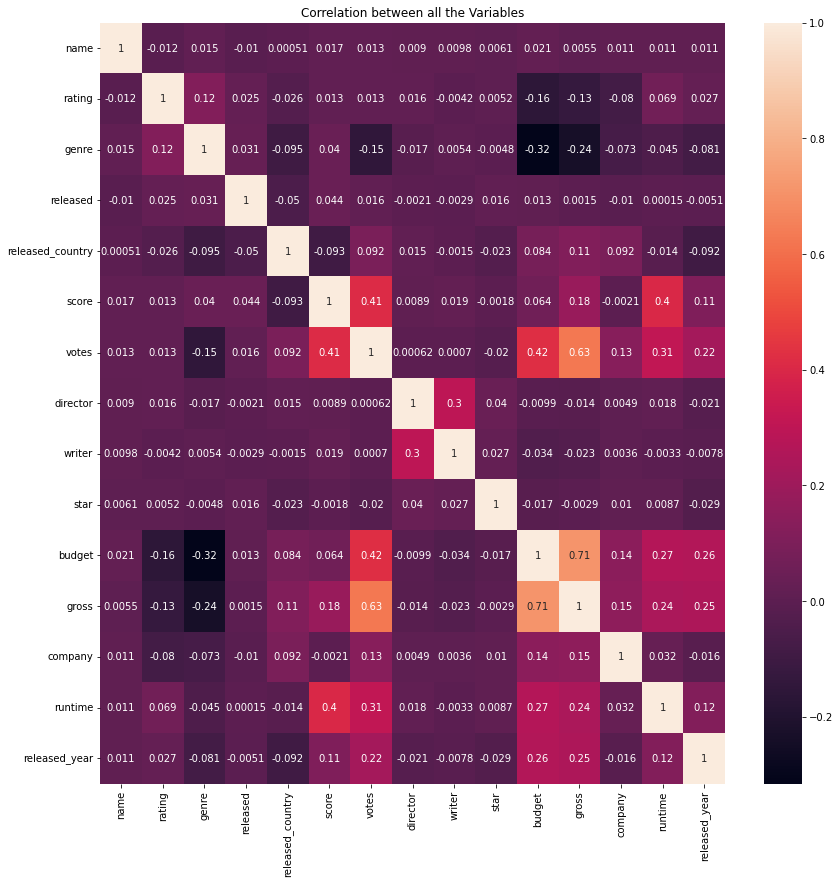

In [453]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot = True, cmap="rocket") 
plt.title('Correlation between all the Variables')
plt.show()

In [ ]:
# here we can see that the higher grossing movie gets higher number of votes i.e high positive correlation
# higher budgets gets higher gross 

In [447]:
Movies_Industry.sort_values(by = 'gross', ascending = False).head(5)

,name,rating,genre,released,released_date,released_country,score,votes,director,writer,star,budget,gross,company,runtime,released_year
5445,532,5,0,685,2009-12-18,55,7.8,1100000,1153,1774,2324,237000000,2847246203,2246,162,2009
7445,534,5,0,172,2019-04-26,55,8.4,903000,162,739,2231,356000000,2797501328,1599,181,2019
3045,6873,5,6,693,1997-12-19,55,7.8,1100000,1153,1774,1587,200000000,2201647264,2246,194,1997
6663,5128,5,0,687,2015-12-18,55,7.8,876000,1123,2541,520,245000000,2069521700,1533,138,2015
7244,535,5,0,181,2018-04-27,55,8.4,897000,162,739,2231,321000000,2048359754,1599,149,2018


In [419]:
# dropping duplicate columns
Movies_Industry = Movies_Industry.drop(columns = ['country', 'year'])